In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Min, Max, N = 0.,40.,11
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [3]:
def h1(y):
    return 100.
def h2(y):
    return 0.
def h3(x):
    return 0.
def h4(x):
    return 0.

In [4]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [5]:
def GetRelaxation(T, Nit = int(1e5), omega = 1.9, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in range(Nit):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return T,itmax

In [6]:
omega = np.arange(0.1,2.0,0.1)
its = []

In [7]:
for val in omega:
  T = InitT()
  Tf1,ite =  GetRelaxation(T, omega=val)

  its.append(ite)

585
345
243
185
147
120
99
83
69
58
49
40
33
25
18
19
19
32
64


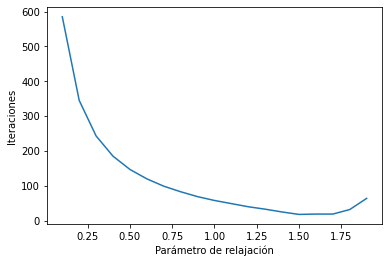

In [8]:
plt.plot(omega, its)
plt.xlabel('Parámetro de relajación')
plt.ylabel('Iteraciones')
plt.show()

In [9]:
omega

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

El parámetro óptimo es cercano a 1.5

Para parámetros mayores o iguales a 2.0, el método de sobrerelajación no converge. Esto tiene que ver con el hecho de que un método iterativo (como el de sobrerelajación) converge si el radio espectral de la matriz asociada es menor a 1. Si el parámetro de sobrerelajación está fuera del intervalo $(0,2)$, el radio espectral supera 1 y por ende no converge.